In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [ ]:
df=pd.read_csv("/content/sample_data/ecommerce_customer_data.csv")
df

,User_ID,Gender,Age,Location,Device_Type,Product_Browsing_Time,Total_Pages_Viewed,Items_Added_to_Cart,Total_Purchases
0,1,Female,23,Ahmedabad,Mobile,60,30,1,0
1,2,Male,25,Kolkata,Tablet,30,38,9,4
2,3,Male,32,Bangalore,Desktop,37,13,5,0
3,4,Male,35,Delhi,Mobile,7,20,10,3
4,5,Male,27,Bangalore,Tablet,35,20,8,2
...,...,...,...,...,...,...,...,...,...
495,496,Male,24,Mumbai,Tablet,40,45,0,0
496,497,Female,24,Hyderabad,Desktop,8,34,4,5
497,498,Male,19,Pune,Desktop,33,41,0,3
498,499,Male,28,Chennai,Desktop,6,32,7,4


Lets do the explorotary data analysis


In [ ]:
df.isnull().sum()

User_ID                  0
Gender                   0
Age                      0
Location                 0
Device_Type              0
Product_Browsing_Time    0
Total_Pages_Viewed       0
Items_Added_to_Cart      0
Total_Purchases          0
dtype: int64

In [ ]:
df.duplicated().sum()

0

we are checking whether the data contains any null values from the above code we can infer that there is no null values in the data

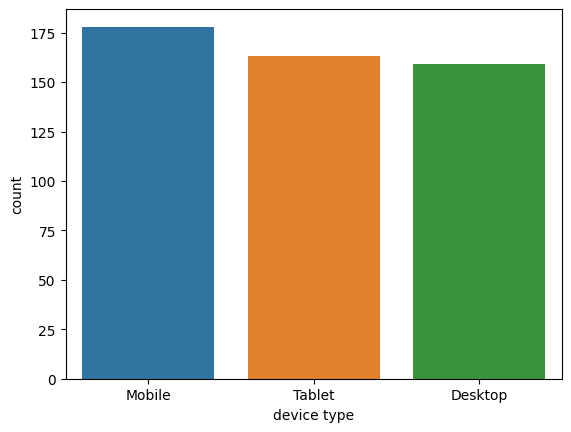

In [ ]:
df1=df['Device_Type'].value_counts()
df1=pd.DataFrame({'device type':df1.index,"count":df1.values})
sns.barplot(x='device type',y='count',data=df1,hue='device type')
plt.show()


analysis 1: from the above graph we can infer that most of the customers used mobile for their purchase followed by tablet and desktop


lets create a new column called uplaced_orders which is calculated from the items added to the cart to total_purchases from the items

In [ ]:
df['unplaced_rders']=df['Items_Added_to_Cart']-df['Total_Purchases']
df

,User_ID,Gender,Age,Location,Device_Type,Product_Browsing_Time,Total_Pages_Viewed,Items_Added_to_Cart,Total_Purchases,unplaced_rders
0,1,Female,23,Ahmedabad,Mobile,60,30,1,0,1
1,2,Male,25,Kolkata,Tablet,30,38,9,4,5
2,3,Male,32,Bangalore,Desktop,37,13,5,0,5
3,4,Male,35,Delhi,Mobile,7,20,10,3,7
4,5,Male,27,Bangalore,Tablet,35,20,8,2,6
...,...,...,...,...,...,...,...,...,...,...
495,496,Male,24,Mumbai,Tablet,40,45,0,0,0
496,497,Female,24,Hyderabad,Desktop,8,34,4,5,-1
497,498,Male,19,Pune,Desktop,33,41,0,3,-3
498,499,Male,28,Chennai,Desktop,6,32,7,4,3


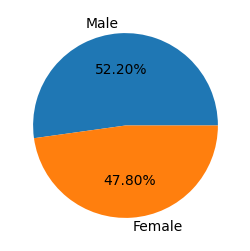

In [ ]:
dfmale=df['Gender'].value_counts()
dfmale=pd.DataFrame({'gender':dfmale.index,'count':dfmale.values})
plt.figure(figsize=(10,3))
plt.pie(dfmale['count'],labels=dfmale['gender'],autopct="%.2f%%")
plt.show()

most of the purchases has been done by male customers compared to female customers

Geographic analysis

Text(0, 0.5, 'total visit')

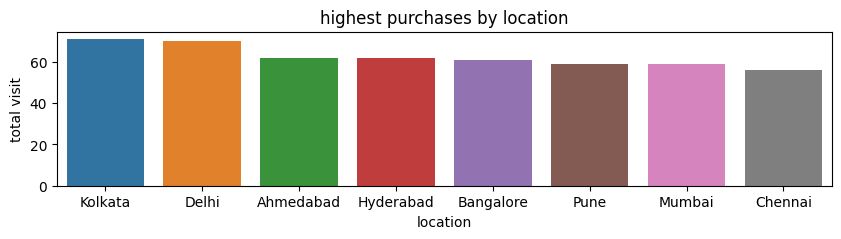

In [ ]:
df_geo=df['Location'].value_counts()
df_geo=pd.DataFrame({'location':df_geo.index,'counts':df_geo.values})
df_geo
plt.figure(figsize=(10,2))
sns.barplot(x='location',y='counts',data=df_geo,hue='location')
plt.title('highest purchases by location')
plt.xlabel('location')
plt.ylabel('total visit')

so from the above graph we can infer that kolkata city has the highest purchase compared to other cities

In [ ]:
df.describe()

,User_ID,Age,Product_Browsing_Time,Total_Pages_Viewed,Items_Added_to_Cart,Total_Purchases,unplaced_rders
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,26.276000,30.740000,27.182000,5.150000,2.464000,2.686000
std,144.481833,5.114699,15.934246,13.071596,3.203127,1.740909,3.633429
min,1.000000,18.000000,5.000000,5.000000,0.000000,0.000000,-5.000000
25%,125.750000,22.000000,16.000000,16.000000,2.000000,1.000000,0.000000
50%,250.500000,26.000000,31.000000,27.000000,5.000000,2.000000,3.000000
75%,375.250000,31.000000,44.000000,38.000000,8.000000,4.000000,6.000000
max,500.000000,35.000000,60.000000,50.000000,10.000000,5.000000,10.000000


lets check which age people purchased the most of the products

In [ ]:
bins=np.linspace(df['Age'].min(),df['Age'].max(),3)
bins


array([18. , 26.5, 35. ])

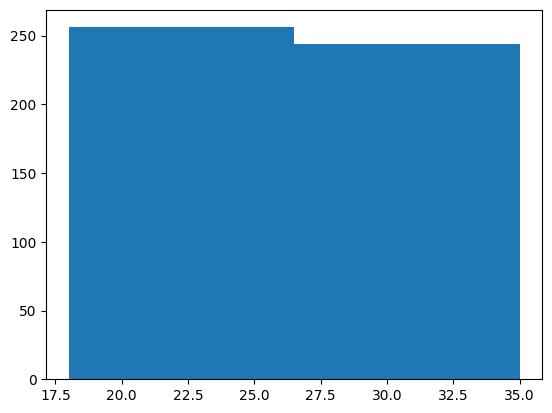

In [ ]:
plt.hist(x=df['Age'],bins=bins)
plt.show()

from the above graph people we can infer that age group between 18-26 has bought most of the products

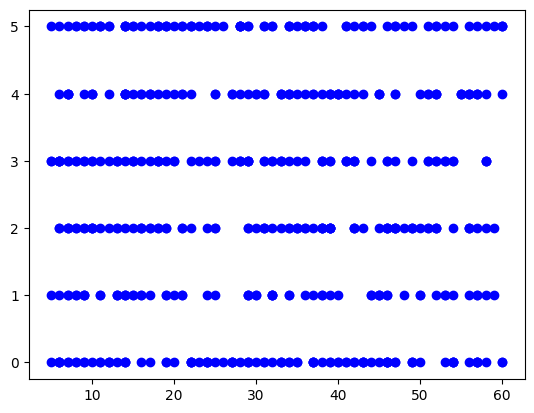

In [ ]:
plt.scatter(df['Product_Browsing_Time'],df['Total_Purchases'],color='b')
plt.show()

we have plotted the scatter plot to check the relationship between product browsing time and total_purchases so the graph is kind of vague which neither postively related nor negatively related which is pretty constant through out

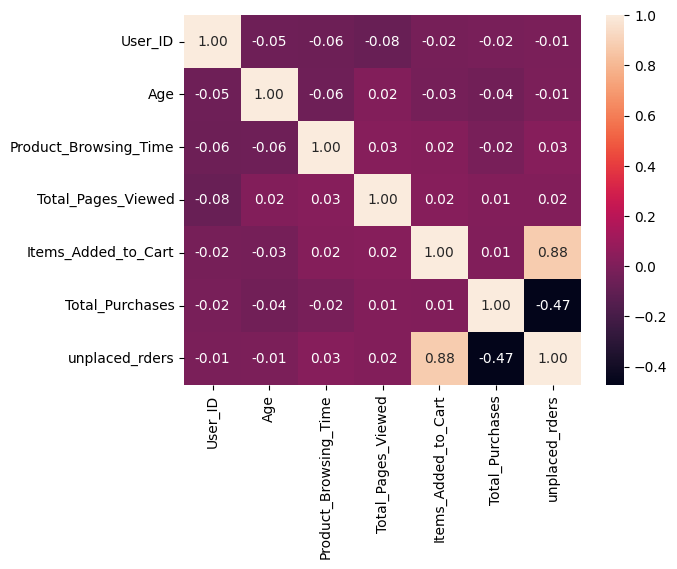

In [ ]:
dff=df.select_dtypes(include='number')
dff1=dff.corr()
sns.heatmap(dff1,annot=True,fmt='.2f')
plt.show()

from the above heatmap you can infer that correlation value between items addedd to unplaced orders is 0.88 which is high postive correlation it means more the items added to cart more the unplaced orders

In [ ]:
df['clv']=(df['Total_Purchases']*df['Total_Pages_Viewed'])/df['Age']
df

,User_ID,Gender,Age,Location,Device_Type,Product_Browsing_Time,Total_Pages_Viewed,Items_Added_to_Cart,Total_Purchases,unplaced_rders,clv
0,1,Female,23,Ahmedabad,Mobile,60,30,1,0,1,0.000000
1,2,Male,25,Kolkata,Tablet,30,38,9,4,5,6.080000
2,3,Male,32,Bangalore,Desktop,37,13,5,0,5,0.000000
3,4,Male,35,Delhi,Mobile,7,20,10,3,7,1.714286
4,5,Male,27,Bangalore,Tablet,35,20,8,2,6,1.481481
...,...,...,...,...,...,...,...,...,...,...,...
495,496,Male,24,Mumbai,Tablet,40,45,0,0,0,0.000000
496,497,Female,24,Hyderabad,Desktop,8,34,4,5,-1,7.083333
497,498,Male,19,Pune,Desktop,33,41,0,3,-3,6.473684
498,499,Male,28,Chennai,Desktop,6,32,7,4,3,4.571429


lets segment the customers based on the purchase count as low medium and high value customers

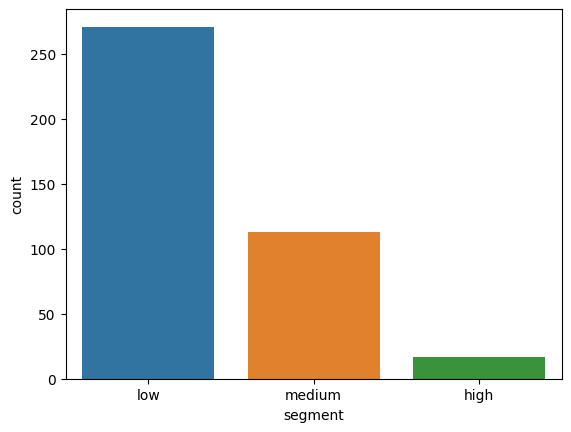

In [ ]:
da=np.linspace(df['clv'].min(),df['clv'].max(),4)
da

df['segment']=pd.cut(df['clv'],bins=da,labels=['low','medium','high'])
df

seg=df['segment'].value_counts()
seg=pd.DataFrame({'segment':seg.index,'count':seg.values})
seg
sns.barplot(x='segment',y='count',data=seg,hue='segment')
plt.show()

from the above graph we can infer that low value customers are quite high than medium and high value customers we have to focus on high value customers my giving discounts and promotions